In [1]:
# Code source : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# Image Source: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs 
# Direct Image Source: https://www.microsoft.com/en-us/download/details.aspx?id=54765
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


Using TensorFlow backend.


In [2]:
img_width = 150
img_height = 150

train_data_dir = 'image_data/training'
validation_data_dir = 'image_data/validation'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [5]:
# Data Augmentation is a method of artificially creating a new dataset for training from 
# the existing training dataset to improve the performance of deep learning neural network 
# with the amount of data available. It is a form of regularization which makes our model generalize better 
# than before.

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
# this is the augmentation configuration we will use for testing:
# only rescaling, avoiding having same training and validation data.
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1206 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [9]:
imgs, labels = next(train_generator)

In [10]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
1.0


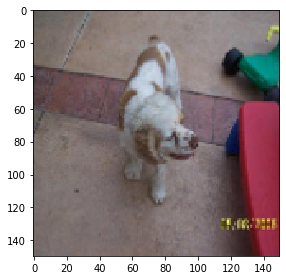

1.0


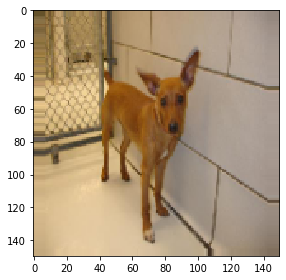

0.0


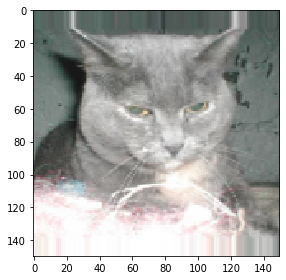

0.0


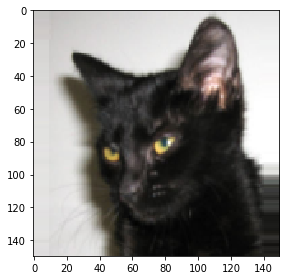

0.0


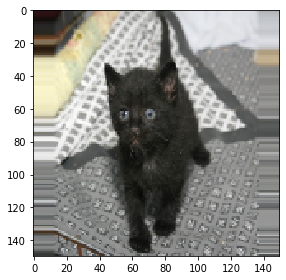

0.0


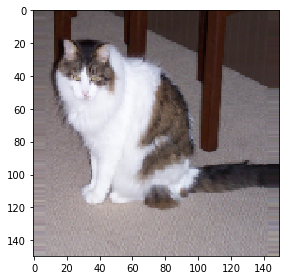

1.0


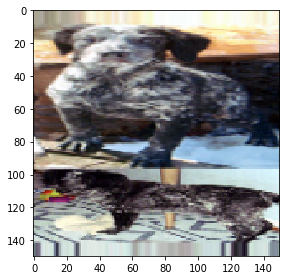

0.0


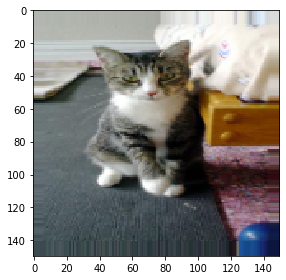

0.0


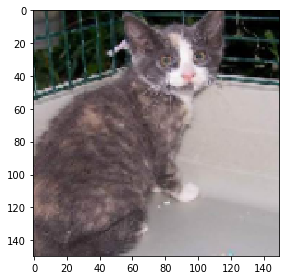

0.0


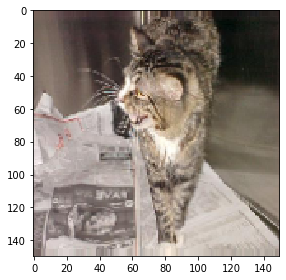

1.0


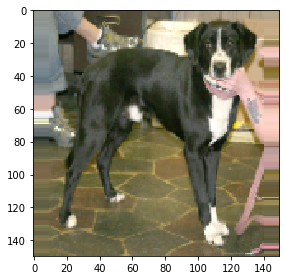

1.0


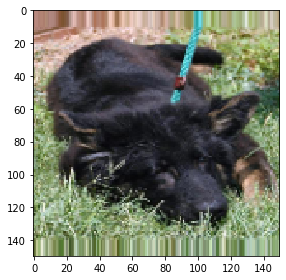

0.0


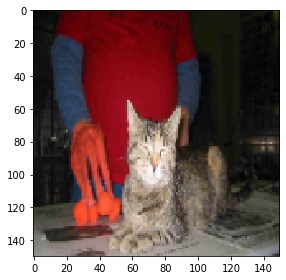

1.0


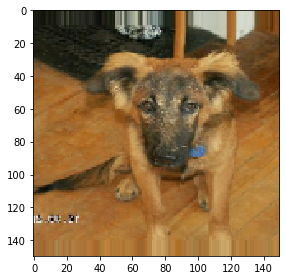

0.0


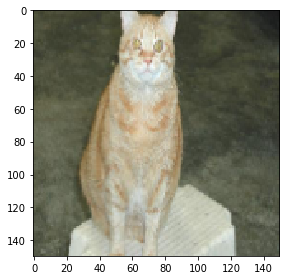

0.0


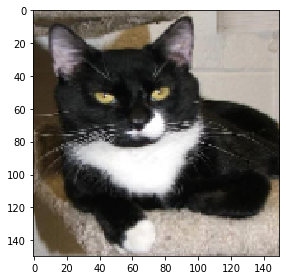

1.0


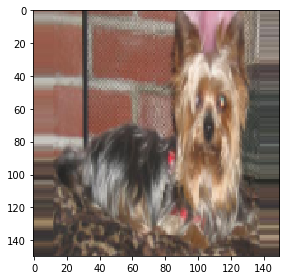

0.0


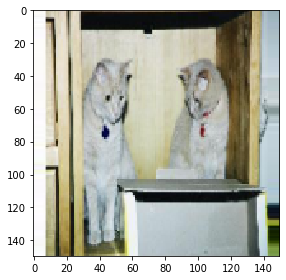

1.0


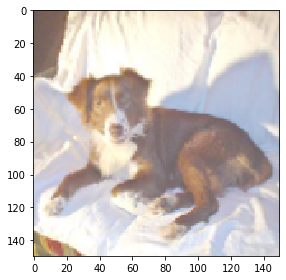

1.0


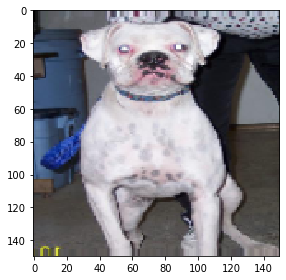

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [12]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 201 images belonging to 2 classes.


In [13]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/5
6/6 [==============================] - 2s 279ms/step - loss: 0.6974 - accuracy: 0.4717 - val_loss: 0.6892 - val_accuracy: 0.7000
Epoch 2/5
6/6 [==============================] - 1s 233ms/step - loss: 0.6991 - accuracy: 0.4417 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 3/5
6/6 [==============================] - 1s 235ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.6000
Epoch 4/5
6/6 [==============================] - 1s 236ms/step - loss: 0.7006 - accuracy: 0.5167 - val_loss: 0.7096 - val_accuracy: 0.3500
Epoch 5/5
6/6 [==============================] - 1s 239ms/step - loss: 0.6946 - accuracy: 0.5083 - val_loss: 0.6963 - val_accuracy: 0.4500


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


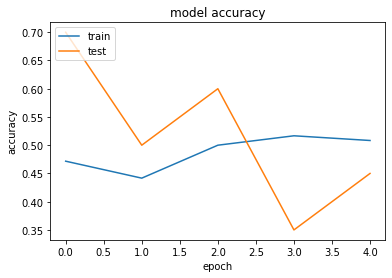

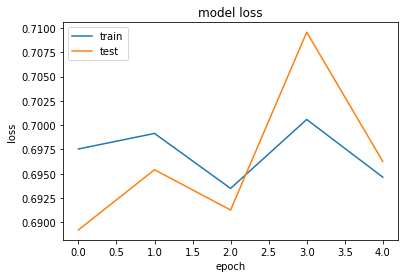

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:

## Now Predict
predict_dir_path='image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['2512.jpg', '2658.jpg', '2994.jpg', '310.jpg', '3285.jpg', '3111.jpg', '234.jpg', '236.jpg']


In [16]:
# predicting images
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

2512.jpg: cat
2658.jpg: cat
2994.jpg: cat
310.jpg: cat
3285.jpg: dog
3111.jpg: dog
234.jpg: cat
236.jpg: cat
Total Dogs : 2
Total Cats : 6
